In [22]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

# Exercise 1

## 1. 
Draw one realization of $n = 100$ independent random variables $X_1, \dots, X_n$ from a standard Gaussian distribution $\mathcal{N}(0, 1)$.

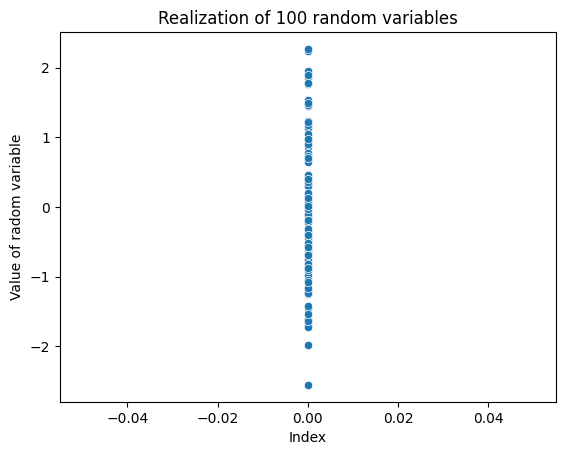

In [3]:
np.random.seed(0)
data_100 = np.random.normal(0, 1, 100)
sns.scatterplot(x=[0]*(len(data_100)), y=data_100)
plt.xlabel("Index")
plt.ylabel("Value of radom variable")
plt.title("Realization of 100 random variables")
plt.show()

To have better insight into the distribution of the random variables, we can plot a histogram of the realization.

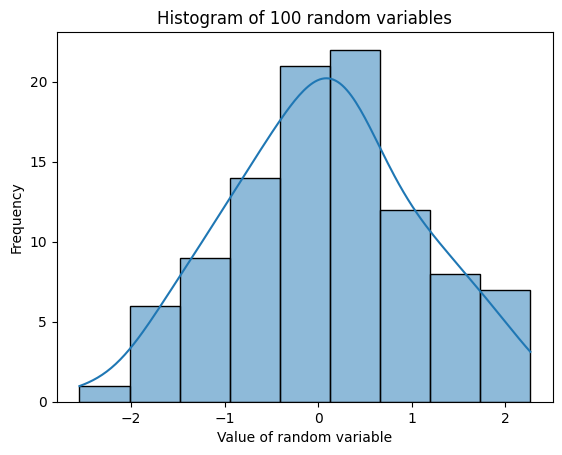

In [4]:
sns.histplot(data_100, kde=True)
plt.xlabel("Value of random variable")
plt.ylabel("Frequency")
plt.title("Histogram of 100 random variables")
plt.show()

### A
For a kernel $K=1\kern-0.25em\text{l}_{[−1;1]}/2$, compute and display the graph of the resulting KDE obtained with different bandwidth values $h \in \mathcal{H}=\{10^{-5},10^{-3},10^{-1},10\}$. What do you see?

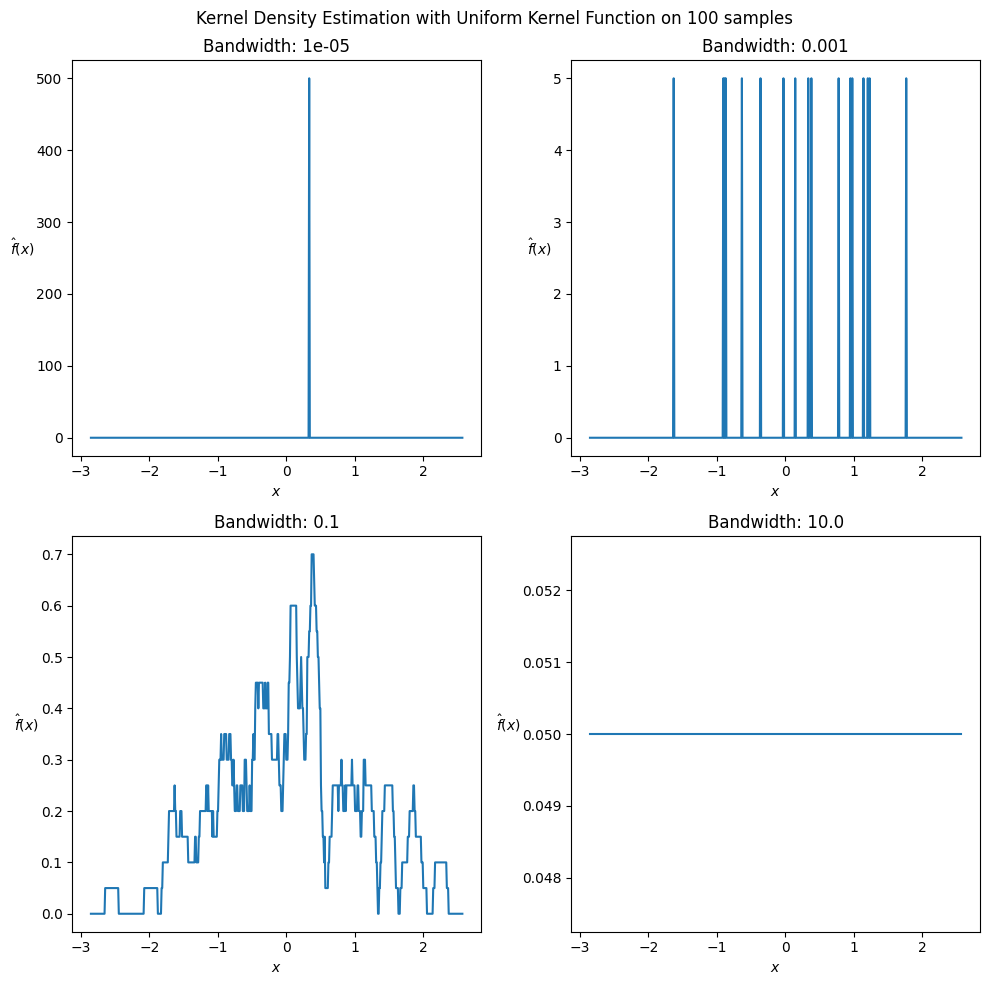

In [5]:
from typing import Callable
import numpy as np
from matplotlib import pyplot as plt


def uniform_kernel_function(x):
    """$K(x)=1_{[-1,1]}/2$"""
    return 0.5 * (np.abs(x) <= 1)


def kde(data: np.ndarray, h: float, kernel_func: Callable[[np.ndarray], np.ndarray], num_points: int = 600):
    x_range = np.linspace(data.min() - 0.3, data.max() + 0.3, num=num_points)

    y_range = kernel_func((x_range[None, :] - data.copy()[:, None]) / h).sum(axis=0) / (h * data.size)
    assert (
        y_range.shape == x_range.shape
    ), f"y_range shape: {y_range.shape}, x_range shape: {x_range.shape}"

    return x_range, y_range

def draw_kde(
    data: np.ndarray,
    h: float,
    ax: plt.Axes,
    kernel_func: Callable[[np.ndarray], np.ndarray],
    num_points: int = 600,
    title: str = None,
):
    """
    :param data: should be a 1D numpy array of data points
    :param h: bandwidth parameter
    :param ax: matplotlib axis object
    :param kernel_func: kernel function, is a function that takes a 1D numpy array and returns a 1D numpy array as PDF values
    """
    x_range, y_range = kde(data, h, kernel_func, num_points=num_points)

    ax.plot(x_range, y_range, label=f"bandwith: {h}")

    ax.set_xlabel("$x$")
    ax.set_ylabel("$\hat{f}(x)$", rotation=0, labelpad=10)
    if title:
        ax.set_title(title)
    return y_range
    # ax.legend(fontsize=14, shadow=True, title='bandwith value', title_fontsize=16)


H = [1e-5, 1e-3, 1e-1, 1e1]
np.random.seed(0)
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Kernel Density Estimation with Uniform Kernel Function on 100 samples")

for ax, h in zip(ax.flatten(), H):
    draw_kde(data_100, h, ax, uniform_kernel_function, title=f"Bandwidth: {h}")

plt.tight_layout()
plt.show()

### Description:
- **h = 1e-5**: Since the bandwidth is very small, the kernel function input gets big (more than 1 or less than -1) and the kernel function output is 0. Therefore, the KDE is 0 almost everywhere. but it seems near to zero we have some peaks.
- **h = 1e-3**: The bandwidth is still small, but it is bigger than the previous one. Therefore, the KDE is not zero everywhere anymore.
- **h = 1e-1**: The bandwidth is big enough to cover the whole range of the data. Therefore, the KDE is step-step and the peaks are not visible anymore.
- **h = 10**: The bandwidth is very big. Therefore, after stretching the kernel function, it covers the whole range of the data. Therefore, the KDE is a constant function.

### B
Repeat the same experiment with n = 10 000. Is there a change? Comment.


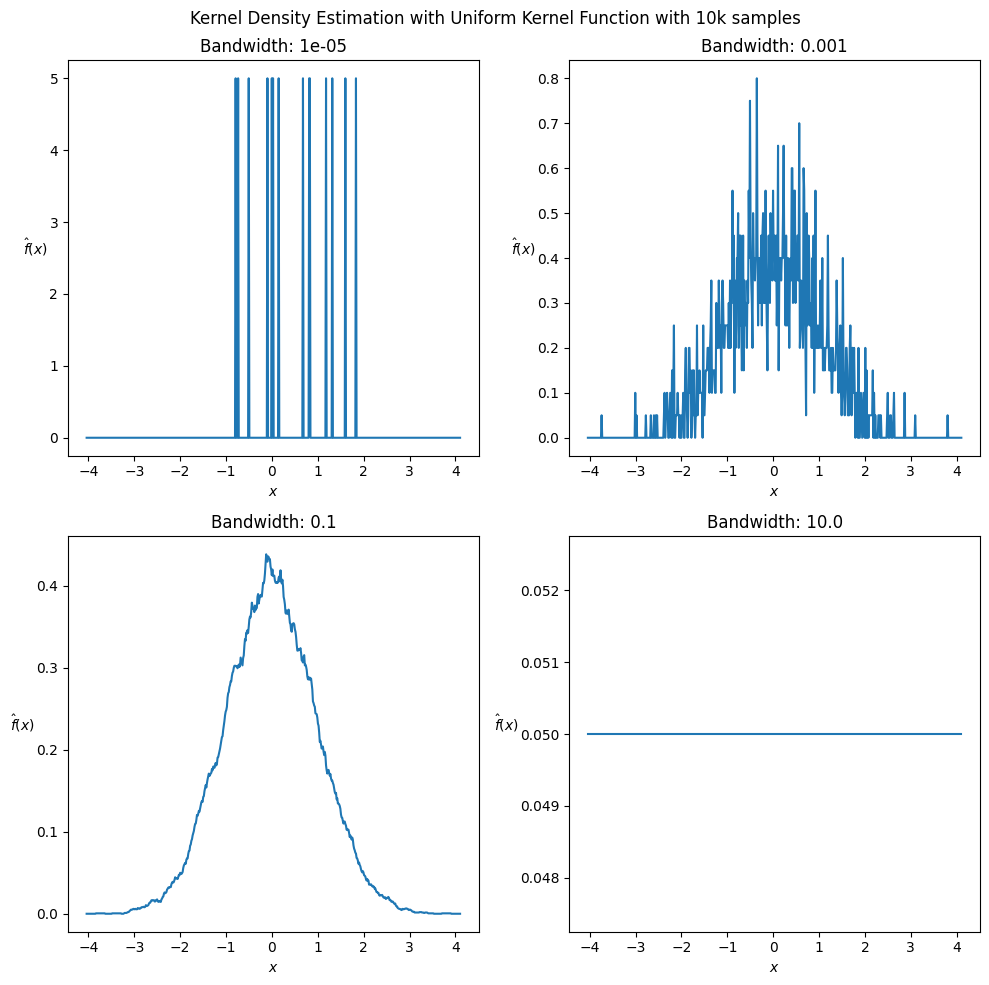

In [6]:
np.random.seed(0)
data_10k = np.random.normal(0, 1, 10000)


fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Kernel Density Estimation with Uniform Kernel Function with 10k samples")

for ax, h in zip(ax.flatten(), H):
    draw_kde(data_10k, h, ax, uniform_kernel_function, title=f"Bandwidth: {h}")


plt.tight_layout()
plt.show()

### Description

After increasing the number of samples, the KDE becomes smoother.

### C
Let us now consider a Gaussian kernel $K^\prime(x) = 1/\sqrt{2\pi}\exp{−x^2/2},\quad x \in R$. Reproduce the same experiments as in the above two questions and make a "by eye" comparison regarding the quality of the approximation you get.

In [7]:
def gaussian_kernel_function(x):
    r"""$K(x)=\frac{1}{\sqrt{2\pi}}e^{-x^2/2}$"""
    return 1 / np.sqrt(2 * np.pi) * np.exp(-x ** 2 / 2)

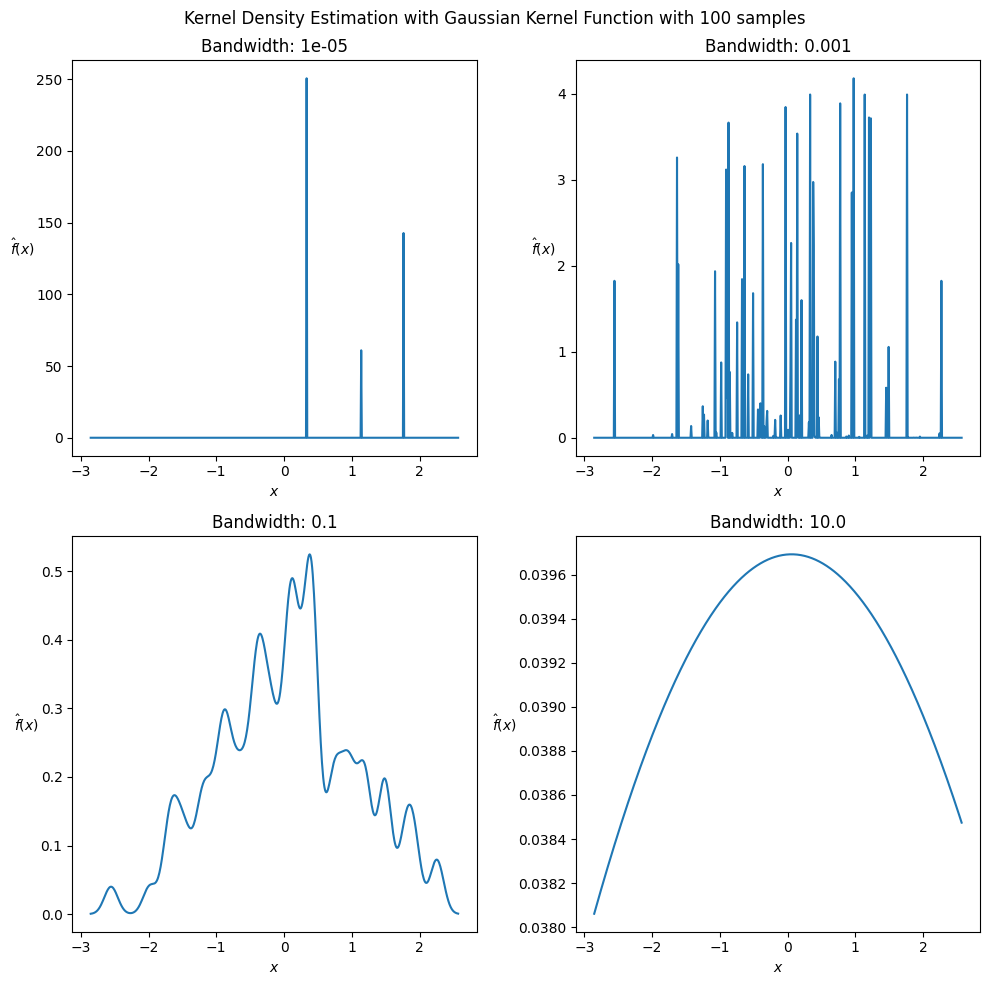

In [8]:

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Kernel Density Estimation with Gaussian Kernel Function with 100 samples")

for ax, h in zip(ax.flatten(), H):
    draw_kde(data_100, h, ax, gaussian_kernel_function, title=f"Bandwidth: {h}")


plt.tight_layout()
plt.show()

1. In the scenario where the bandwidth is exceedingly small ($h=10^{-5}$ and $h=0.001$), the Kernel Density Estimation (KDE) tends to overfit the data. This results in a graph that closely mirrors each individual data point, manifesting as a series of peaks. This phenomenon is indicative of a high variance and low bias situation, suggesting that the estimator is overly sensitive to the data.

2. As the bandwidth is increased ($h = 0.1$), the KDE begins to exhibit a smoother behavior. However, it may still incorporate some noise in addition to the fundamental structure of the data.

3. In the case of an excessively large bandwidth (h=10), the KDE tends to oversmooth the data, which leads to underfitting. This results in a graph that is overly flat and fails to capture the intricate structure of the distribution. This is indicative of a situation with low variance but high bias.

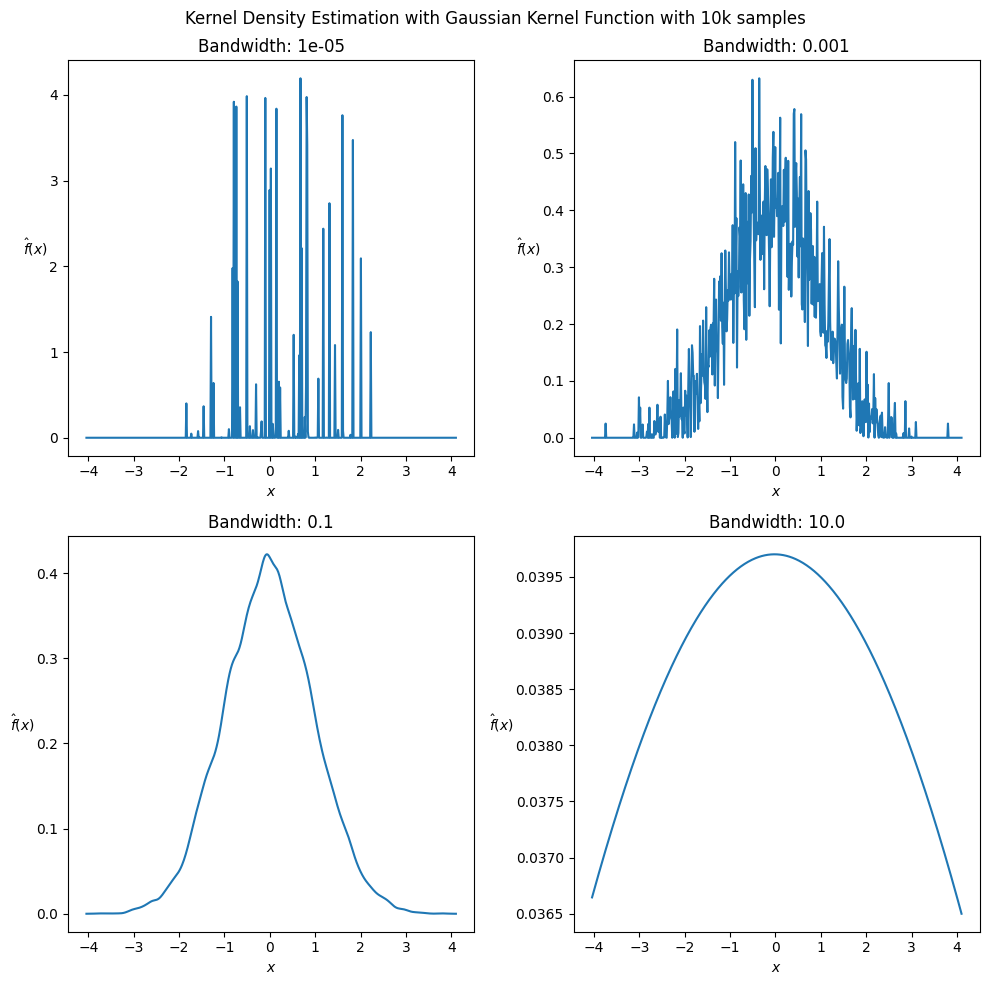

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Kernel Density Estimation with Gaussian Kernel Function with 10k samples")


for ax, h in zip(ax.flatten(), H):
    draw_kde(data_10k, h, ax, gaussian_kernel_function, title=f"Bandwidth: {h}")


plt.tight_layout()
plt.show()

### Description

The Gaussian kernel is a better approximation for the Gaussian distribution. Therefore, the KDE is smoother and more accurate.

To make better comparison, lets plot the KDEs side by side.

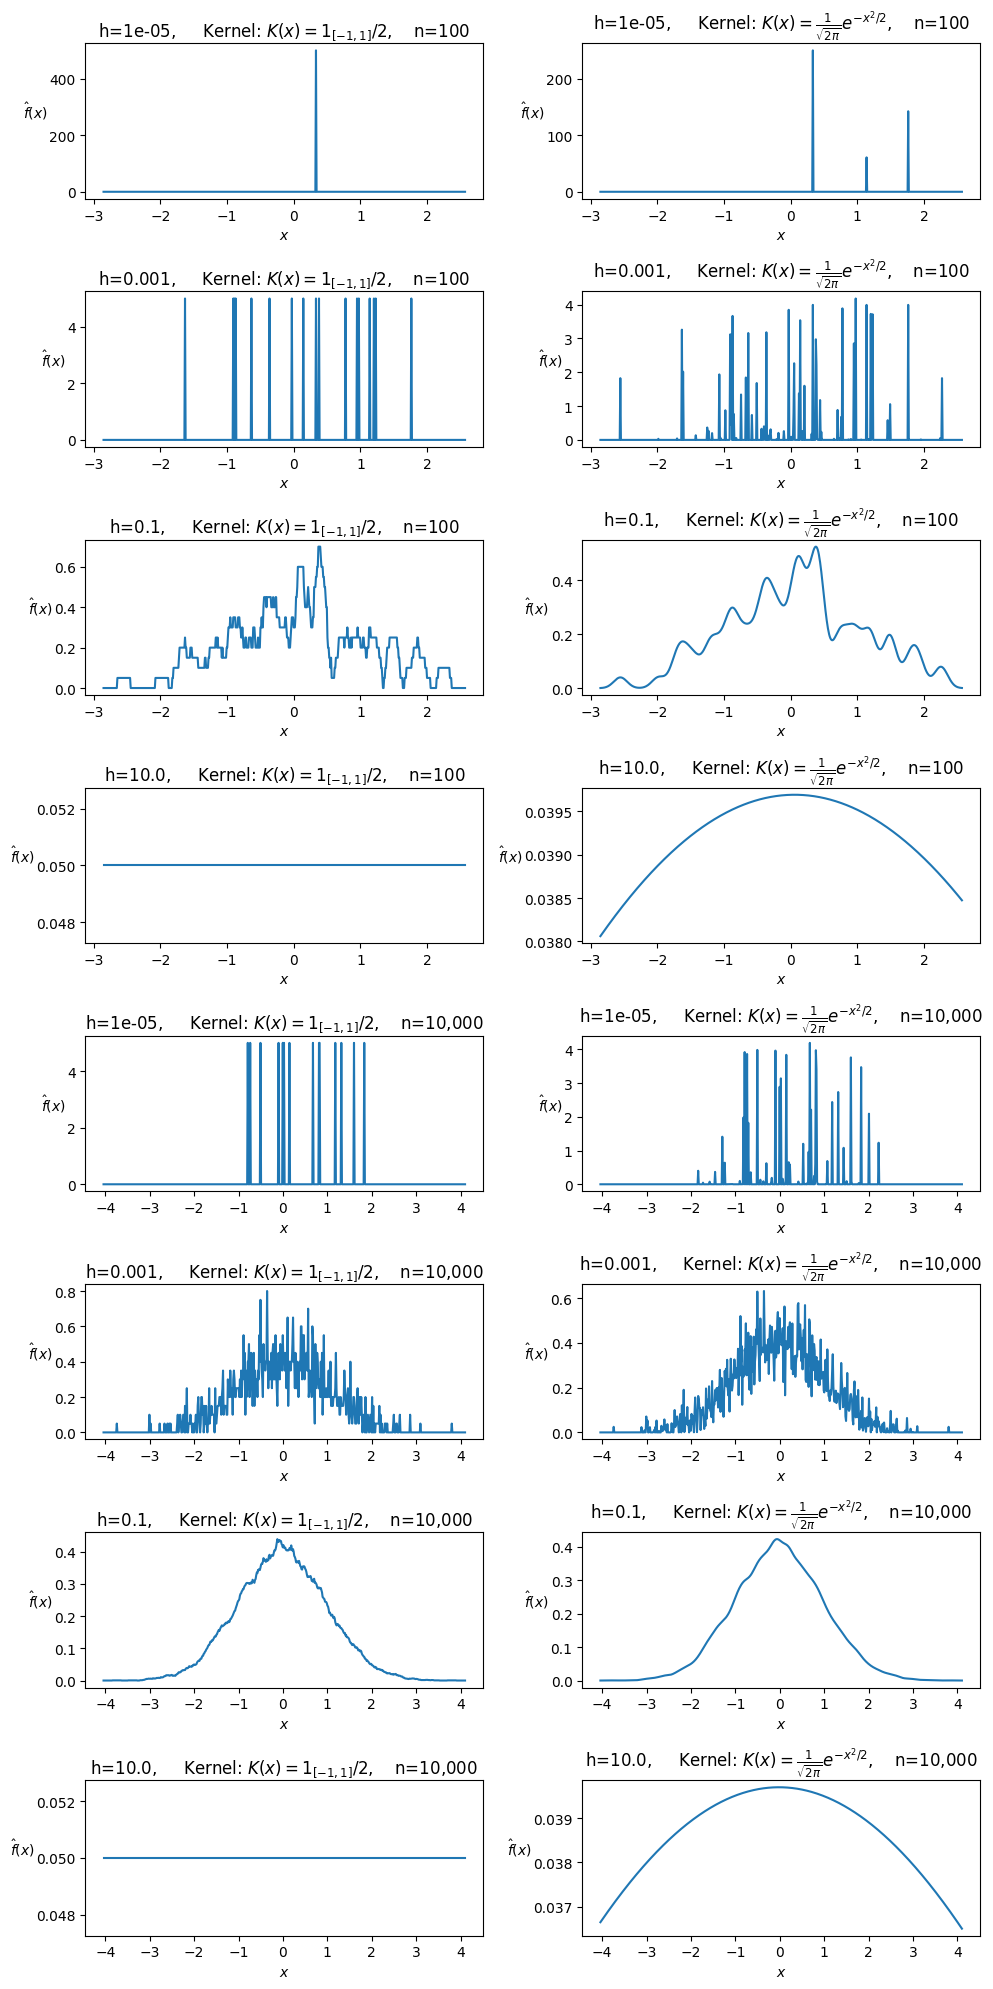

In [10]:
from itertools import product

fig, axes = plt.subplots(8, 2, figsize=(10, 20))

axes = axes.flatten()
for ax, (data, h, kernel_func) in zip(axes, product([data_100, data_10k], H, [uniform_kernel_function, gaussian_kernel_function])):
    draw_kde(data, h, ax, kernel_func, title=f"{h=},     Kernel: {kernel_func.__doc__},    n={len(data):,}")

plt.tight_layout()
plt.show()

### Description

The KDEs are plotted side by side. The KDEs with the Gaussian kernel are smoother and more accurate.

## 2
Using a Monte-Carlo (MC) strategy, compute (an approximation to) the $MSE_h(x_0)$ criterion
for the KDE built from $K, n = 100$, and varying the bandwidth on the grid $\mathcal{H}$.

## A
Start with $x_0 = −2$ Which value of h is the best?


To have a better visualization of the $MSE_h(x_0)$ criterion, we can plot it for different bandwidth values (whitout applying Monte-Carlo strategy).

h=1e-05, real_value=0.16447137818539254, kde_values=0.0, mse_values[-1]=0.027050834242202417
h=0.001, real_value=0.16447137818539254, kde_values=0.0, mse_values[-1]=0.027050834242202417
h=0.1, real_value=0.16447137818539254, kde_values=0.04943361872111765, mse_values[-1]=0.013233686102560366
h=10.0, real_value=0.16447137818539254, kde_values=0.05, mse_values[-1]=0.013103696423663162
Best h: 10.0


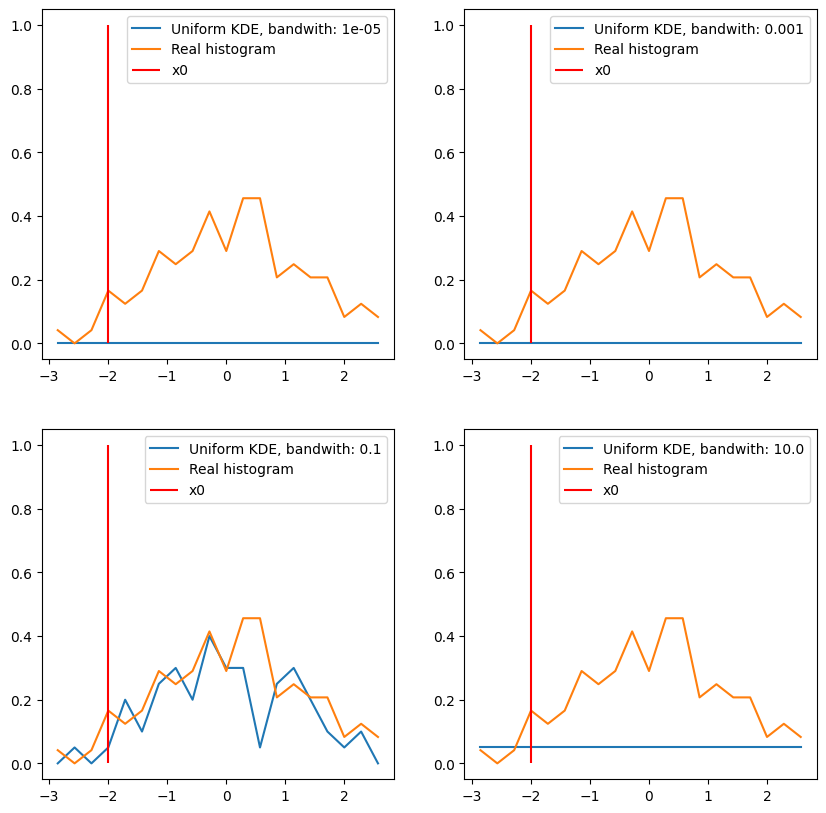

In [11]:
x0 = -2
def mse(x, y):
    return np.mean((x - y) ** 2)

num_points=20
real_hist = np.histogram(data_100, bins=num_points, density=True)[0]
mse_values = []

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
for h,ax in zip(H, axes):
    x_range, y_range = kde(data_100, h, uniform_kernel_function, num_points=num_points)
    kde_values = np.interp(x0, x_range, y_range)
    real_value = np.interp(x0, x_range, real_hist)
    mse_values.append(mse(kde_values, real_value))
    print(f"{h=}, {real_value=}, {kde_values=}, {mse_values[-1]=}")
    ax.plot(x_range, y_range, label=f"Uniform KDE, bandwith: {h}")
    ax.plot(x_range, real_hist, label="Real histogram")
    ax.vlines(x0, 0, 1, color="red", label="x0")
    ax.legend()

best_h = H[np.argmin(mse_values)]
print(f"Best h: {best_h}")


Now, we can apply the Monte-Carlo strategy to compute the $MSE_h(x_0)$ criterion for different bandwidth values.

Results for 1000 Monte Carlo simulations (x0=-2):
h=1e-05 --> mse=0.01251
h=0.001 --> mse=0.14896
h=0.1   --> mse=0.00533
h=10.0  --> mse=0.00528
Best h: 10.0


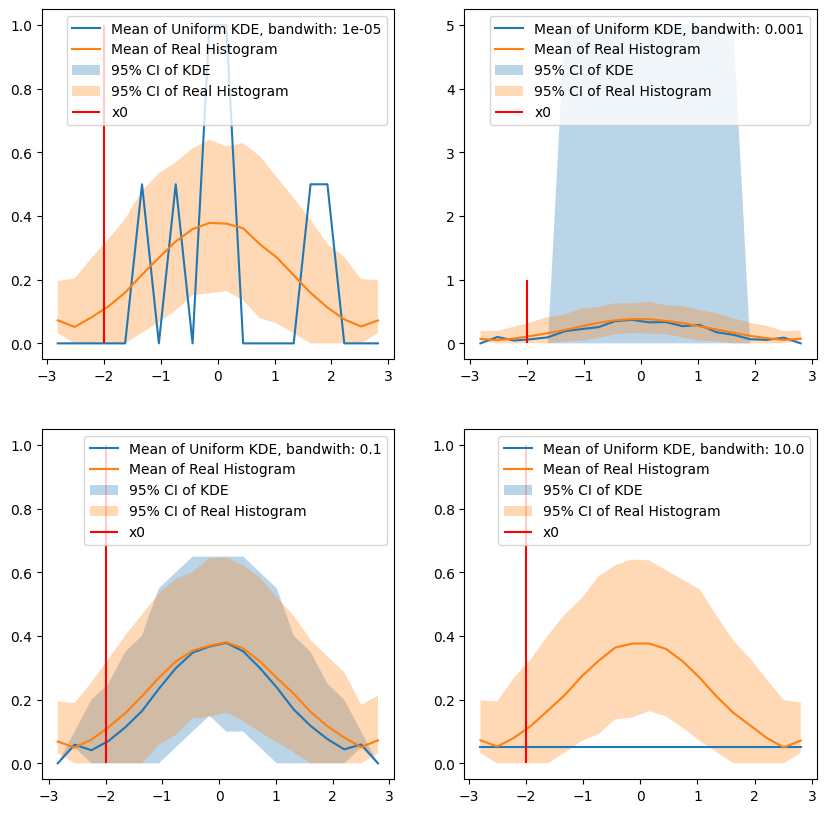

In [16]:


x0 = -2
mc_count = 1000
num_points = 20
np.random.seed(2)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
mc_mse_values = []
for h, ax in zip(H, axes):
    mse_values = []
    all_x_range = []
    all_y_range = []
    all_real_hist = []
    for _ in range(mc_count):
        data = np.random.normal(0, 1, 100)
        real_hist = np.histogram(data, bins=num_points, density=True)[0]
        x_range, y_range = kde(data, h, uniform_kernel_function, num_points=num_points)
        kde_values = np.interp(x0, x_range, y_range)
        real_value = np.interp(x0, x_range, real_hist)
        mse_values.append(mse(kde_values, real_value))
        all_x_range.append(x_range)
        all_y_range.append(y_range)
        all_real_hist.append(real_hist)
    mc_mse_values.append(np.mean(mse_values))
    ax.plot(np.mean(all_x_range, axis=0), np.mean(all_y_range, axis=0), label=f"Mean of Uniform KDE, bandwith: {h}")
    ax.plot(np.mean(all_x_range, axis=0), np.mean(all_real_hist, axis=0), label="Mean of Real Histogram")

    ax.fill_between(
        np.mean(all_x_range, axis=0),
        np.percentile(all_y_range, 2.5, axis=0),
        np.percentile(all_y_range, 97.5, axis=0),
        alpha=0.3,
        label="95% CI of KDE",
    )
    ax.fill_between(
        np.mean(all_x_range, axis=0),
        np.percentile(all_real_hist, 2.5, axis=0),
        np.percentile(all_real_hist, 97.5, axis=0),
        alpha=0.3,
        label="95% CI of Real Histogram",
    )
    ax.vlines(x0, 0, 1, color="red", label="x0")
    ax.legend()


print(f"Results for {mc_count} Monte Carlo simulations ({x0=}):")
best_h = H[np.argmin(mc_mse_values)]
t = [[f"{h=}",f"{mse=:.5f}"] for h, mse in zip(H, mc_mse_values)]
w1 = max(len(s[0]) for s in t)
print(*[f"{h:<{w1}} --> {mse}" for h, mse in t], sep="\n")

print(f"Best h: {best_h}")

### Description

As we can see the different between the MSEs of h = 10 and h = 0.1 is very small. But according to the plot, the best bandwidth is h = 0.1.

### B 
Repeat the experiments with $x_0 = 0.1$. Same question. Is there a difference? What conclusion could you draw?

results for x0=0.1
h=1e-05 --> mse=127.45514
h=0.001 --> mse=1.45603
h=0.1   --> mse=0.00448
h=10.0  --> mse=0.12716
Best h: 0.1


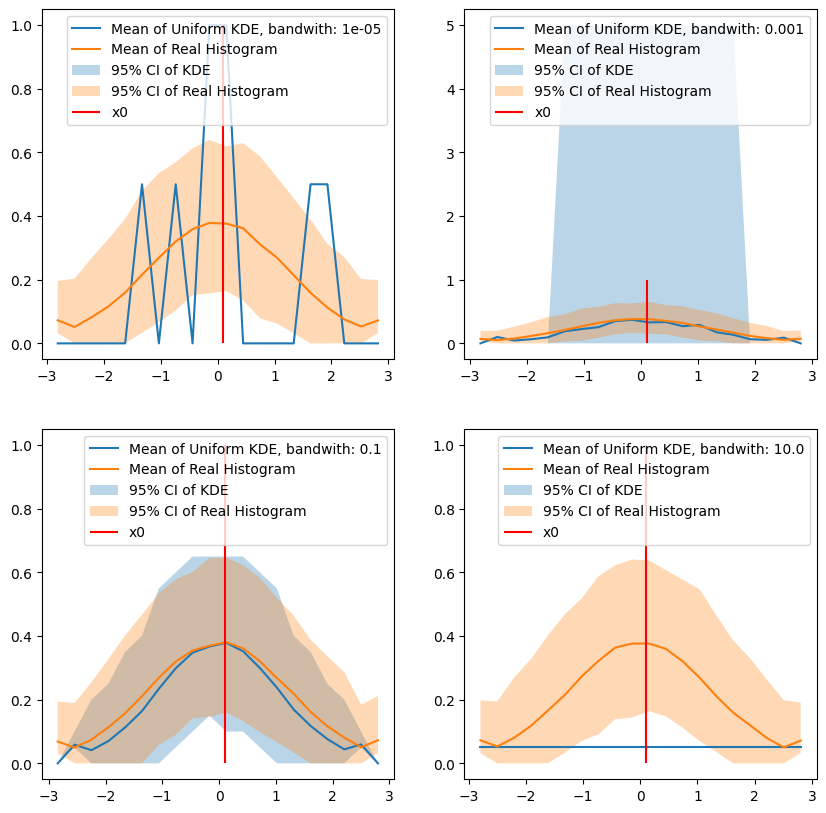

In [14]:
x0 = 0.1
mc_count = 1000
num_points = 20
np.random.seed(2)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
mc_mse_values = []
for h, ax in zip(H, axes):
    mse_values = []
    all_x_range = []
    all_y_range = []
    all_real_hist = []
    for _ in range(mc_count):
        data = np.random.normal(0, 1, 100)
        real_hist = np.histogram(data, bins=num_points, density=True)[0]
        x_range, y_range = kde(data, h, uniform_kernel_function, num_points=num_points)
        kde_values = np.interp(x0, x_range, y_range)
        real_value = np.interp(x0, x_range, real_hist)
        mse_values.append(mse(kde_values, real_value))
        all_x_range.append(x_range)
        all_y_range.append(y_range)
        all_real_hist.append(real_hist)
    mc_mse_values.append(np.mean(mse_values))
    ax.plot(np.mean(all_x_range, axis=0), np.mean(all_y_range, axis=0), label=f"Mean of Uniform KDE, bandwith: {h}")
    ax.plot(np.mean(all_x_range, axis=0), np.mean(all_real_hist, axis=0), label="Mean of Real Histogram")

    ax.fill_between(
        np.mean(all_x_range, axis=0),
        np.percentile(all_y_range, 2.5, axis=0),
        np.percentile(all_y_range, 97.5, axis=0),
        alpha=0.3,
        label="95% CI of KDE",
    )
    ax.fill_between(
        np.mean(all_x_range, axis=0),
        np.percentile(all_real_hist, 2.5, axis=0),
        np.percentile(all_real_hist, 97.5, axis=0),
        alpha=0.3,
        label="95% CI of Real Histogram",
    )
    ax.vlines(x0, 0, 1, color="red", label="x0")
    ax.legend()


print(f"results for {x0=}")
best_h = H[np.argmin(mc_mse_values)]
t = [[f"{h=}",f"{mse=:.5f}"] for h, mse in zip(H, mc_mse_values)]
w1 = max(len(s[0]) for s in t)
print(*[f"{h:<{w1}} --> {mse}" for h, mse in t], sep="\n")

print(f"Best h: {best_h}")

### Description
As  we can see, the difference between the MSEs of h = 10 and h = 0.1 is not small anymore and we clearly can see the best bandwidth is h = 0.1.
Since, $x_0 = -2$ is a point near to the tails of the Gaussian distribution, we can somehow consider it as an outlier. 

### C
Let us now consider a somewhat different criterion denoted by $DMSE(h)$ defined by
$$
DMSE(h) = \frac{1}{T} \sum_{t=1}^{T} MSE_h(x_t),
$$
with $x_t = −3 + \frac{6t}{N}$, for $1 \leq t \leq T$ and $T = 200$. Display the graph of $h \in H \mapsto DMSE(h)$. Which value of h is the best? Is there a change compared to what you observed for the $MSEh(x0)$?

In [30]:
x_values = np.linspace(-3, 3, 200)
mc_count = 1000
num_points = 20
np.random.seed(2)

dmse_values = [] # this is a function of h -> DMSE(h)
for h in tqdm(H):
    mse_values = [] # this is a function of x -> MSE(x)
    for x0 in tqdm(x_values, leave=False):
        mc_values = []
        for _ in range(mc_count):
            data = np.random.normal(0, 1, 100)
            real_hist = np.histogram(data, bins=num_points, density=True)[0]
            x_range, y_range = kde(data, h, uniform_kernel_function, num_points=num_points)
            kde_values = np.interp(x0, x_range, y_range)
            real_value = np.interp(x0, x_range, real_hist)
            mc_values.append(mse(kde_values, real_value))
        mse_values.append(np.mean(mc_values))
    dmse_values.append(np.mean(mse_values))
print(dmse_values)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

[59.08426384088317, 0.5773273133777195, 0.007232385883341352, 0.043221838518561775]


In [39]:
print(f"results for {len(x_values)} number of x values starting from {x_values[0]} to {x_values[-1]} with step {(x_values[1]-x_values[0]):.2f}")
best_h = H[np.argmin(dmse_values)]
t = [[f"{h=}",f"{mse=:.5f}"] for h, mse in zip(H, dmse_values)]
w1 = max(len(s[0]) for s in t)
print(*[f"{h:<{w1}} --> {mse}" for h, mse in t], sep="\n")

print(f"Best h: {best_h}")

results for 200 number of x values starting from -3.0 to 3.0 with step 0.03
h=1e-05 --> mse=59.08426
h=0.001 --> mse=0.57733
h=0.1   --> mse=0.00723
h=10.0  --> mse=0.04322
Best h: 0.1


### Description
As we can see the best $h$ is still 0.1 with very big difference between the $DMSE(h)$ of h = 10 and h = 0.1.